## Optimizing Monetization: Data-Driven Strategies for Streaming Platforms
### Project Proposal by Hannah Halvorsen
### Data Mining, Discovery, and Exploration
### Harvard Extension School
### Spring 2024


# Executive Summary

In an ever-evolving digital landscape, the success of streaming platforms hinges on my ability to optimize monetization strategies. My project proposes three hypotheses aimed at increasing monetization by leveraging data-driven insights and targeted interventions.

Identifying Popular Streamers: By analyzing metrics such as receivedLikeCount, uniqueViewerCount, and totalViewerDuration, I aim to identify popular streamers whose content garners high engagement. Offering incentives or premium features to these streamers can stimulate content creation and enhance viewer engagement, thereby driving monetization efforts.

Optimizing Streaming Schedule: Analyzing streaming data's temporal patterns, including beginTime and endTime, allows me to pinpoint peak streaming hours and days. By encouraging streamers to align their schedules with these peak times, I can maximize viewer engagement and capitalize on potential points transactions.

Promoting Points Transactions: Through comprehensive analysis of points_transaction_log data, I aim to uncover user behavior regarding points transactions. Identifying transaction patterns and trends enables me to devise targeted marketing strategies, such as limited-time discounts or exclusive rewards during popular streams, to promote points transactions effectively.

Datasets and Observations: My analysis draws from two primary datasets—all_stream_info and points_transaction_log—as well as a data dictionary providing valuable column descriptions. Despite encountering missing values and timestamp format discrepancies, preprocessing steps ensure data readiness for analysis.

Analytic Methods: Leveraging sophisticated analytic methods such as HyperLogLog (HLL) enables efficient estimation of cardinality, quantiles, and transaction frequencies. These methods provide crucial insights into user behavior and transaction patterns, guiding my recommendations for increasing monetization.

Implementation Steps: My approach involves loading data into pandas DataFrames, preprocessing as needed, and calculating relevant statistics and metrics for each hypothesis. Visualization techniques, including plots and charts, aid in effectively communicating insights derived from the analysis.

In conclusion, my project offers a holistic framework for maximizing monetization on streaming platforms. By harnessing the power of data analytics and targeted interventions, I empower platform stakeholders to optimize content strategies, enhance viewer engagement, and drive revenue growth in the dynamic world of online streaming.

## Problem Statement:

Streaming platforms face the challenge of maximizing monetization opportunities amidst growing competition and evolving user preferences. While these platforms attract a large audience, translating viewership into revenue remains a complex task.

## Objectives:

Identify popular streamers to enhance engagement and content creation.
Optimize streaming schedules to maximize viewer engagement and potential points transactions.
Promote points transactions through targeted marketing strategies.

## Value Proposition:

By leveraging data-driven insights, this project aims to empower streaming platforms with actionable strategies to increase revenue generation. Through the identification of popular streamers, optimization of streaming schedules, and promotion of points transactions, the project endeavors to enhance user engagement and drive monetization effectively.

# Data Preparation Steps

## 1. Load and clean the data

### Explore the data, check for missing values, clean the data if necessary

## 2. Hypothesis

## 3. Show some initial Exploration of the stream data to justify project and show this is a viable dataset.

## 4. EDA of Points Data

## 5. Use HyperLogLog to estimate cardinality

### Estimate the cardinality of unique users in the points dataset and find the error percentage of hyperlog

### calculate distinct users for the stream data and calculate hyperlog error

### use the hyperlog to estimate cardinality for each day of the week

### Observations from cardinality estimates for day of week and hour of day

## 6. Use Apriori Algorithm to find frequent item sets in purchase behavior

### Observations and recommendations beased on the frequent item sets

## 7. Summary

## 8. Recommended next steps

# Load the data and Import necessary libraries

In [7]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the data
all_stream_info = pd.read_csv('/Users/hannah/Downloads/archive/all_stream_info.csv')
points_transaction_log = pd.read_csv('/Users/hannah/Downloads/archive/points_transaction_log.csv')
data_dictionary = pd.read_csv('/Users/hannah/Downloads/archive/all_stream_info - data dictionary.csv')

# Data exploration and cleaning
Explore the data, check for missing values, clean the data if necessary

### Print info and null values for each dataframe and its respective columns 

In [2]:
# Display the first few rows of each dataset
print("First few rows of all_stream_info:")
print(all_stream_info.head())

print("\nFirst few rows of points_transaction_log:")
print(points_transaction_log.head())

print("\nFirst few rows of data_dictionary:")
print(data_dictionary.head())

# Check for missing values
print("\nMissing values in all_stream_info:")
print(all_stream_info.isnull().sum())

print("\nMissing values in points_transaction_log:")
print(points_transaction_log.isnull().sum())

print("\nMissing values in data_dictionary:")
print(data_dictionary.isnull().sum())

First few rows of all_stream_info:
   liveStreamID                beginTime                  endTime  duration  \
0     109437538  2020-06-22 11:55:21 UTC  2020-06-22 16:37:19 UTC     16918   
1     109441785  2020-06-22 14:55:26 UTC  2020-06-22 21:31:19 UTC     23753   
2     109438205  2020-06-22 12:20:34 UTC  2020-06-22 16:02:46 UTC     13332   
3     109438917  2020-06-22 12:54:21 UTC  2020-06-22 14:47:27 UTC      6786   
4     109442185  2020-06-22 15:18:20 UTC  2020-06-22 15:48:02 UTC      1782   

      closeBy  maxLiveViewerCount            maxLiveViewerTime  \
0   normalEnd                 363   2020-06-22 16:28:17.87 UTC   
1   normalEnd                 100  2020-06-22 19:07:52.872 UTC   
2  disconnect                 471  2020-06-22 14:53:26.692 UTC   
3   normalEnd                  44  2020-06-22 14:29:13.806 UTC   
4   normalEnd                  52  2020-06-22 15:42:33.849 UTC   

   privateLiveStream  receivedLikeCount  streamerType  ...  durationGTE5sec  \
0             

# Observations from the exploration of the Data

all_stream_info Dataset

There are missing values in several columns, such as closeBy, maxLiveViewerTime, cultureGroup, isContracted, totalViewerDuration, avgViewerDuration, avgStreamJoinDuration, and dau.
The beginTime and endTime columns are in UTC format, which may need to be converted to datetime objects for easier analysis.
The closeBy column indicates how the stream ended, which could provide insights into user behavior.

points_transaction_log Dataset

There are missing values in the recordID column.
The utcTimestamp and timestamp columns are in UTC format, which may need to be converted to datetime objects for easier analysis.
The type column indicates the type of transaction, which could be useful for understanding points transactions.

data_dictionary Dataset

No missing values were found in this dataset.
Provides descriptions of the columns in the other datasets, which will be useful for understanding the data.

# Hypothesis for increasing monetization:

### Identify Popular Streamers: 
Analyze the receivedLikeCount, uniqueViewerCount, and totalViewerDuration to identify popular streamers. Increase monetization efforts by offering incentives or premium features to these streamers to encourage more content creation and engagement.

### Optimize Streaming Schedule: 
Analyze the beginTime and endTime to identify peak streaming hours and days. Encourage streamers to schedule their streams during these peak times to maximize viewer engagement and potential points transactions.

### Promote Points Transactions: 
Analyze the points_transaction_log dataset to understand user behavior regarding points transactions. Identify patterns or trends in points transactions and devise targeted marketing strategies to promote points transactions, such as offering limited-time discounts or exclusive rewards for points purchases during popular streams.

1. Identify Popular Streamers:
Calculate statistics such as receivedLikeCount, uniqueViewerCount, and totalViewerDuration for each streamer.
Identify streamers with high engagement metrics and viewership.
Offer incentives or premium features to these popular streamers to encourage more content creation and engagement.
2. Optimize Streaming Schedule:
Analyze the beginTime and endTime of streams to identify peak streaming hours and days.
Calculate statistics such as average streaming duration, frequency of streams, and viewer count during different time periods.
Encourage streamers to schedule their streams during peak times to maximize viewer engagement and potential points transactions.
3. Promote Points Transactions:
Analyze the points_transaction_log dataset using statstream to understand user behavior regarding points transactions.
Calculate statistics such as the frequency of points transactions, total points purchased, and popular items purchased using points.
Identify patterns or trends in points transactions, such as peak transaction times or popular items.
Devise targeted marketing strategies to promote points transactions, such as offering limited-time discounts or exclusive rewards during popular streams.
Implementation Steps:
Load the streaming data and points transaction logs into pandas DataFrames.
Preprocess the data if necessary (e.g., converting timestamps to datetime objects).
Calculate relevant statistics and metrics for each hypothesis.
Analyze the results to draw insights and make recommendations for increasing monetization.
Visualize the findings using plots or charts to communicate the insights effectively.

# Show some initial Exploration to justify project and show this is a viable dataset. 

## Calculate and Print the top two streamers to get an idea of the data

In [172]:
import pandas as pd

# Load the data
all_stream_info = pd.read_csv("/Users/hannah/Downloads/archive/all_stream_info.csv")

# Group by userID and aggregate statistics
streamer_grouped = all_stream_info.groupby('userID').agg({
    'receivedLikeCount': 'sum',
    'uniqueViewerCount': 'sum',
    'totalViewerDuration': 'sum'
})

# Sort the streamers based on aggregated values
top_streamers = streamer_grouped.sort_values(by=['receivedLikeCount', 'uniqueViewerCount', 'totalViewerDuration'], ascending=False)

# Display top streamers
print("Top Streamers:")
print(top_streamers.head(2))  # Display top 10 streamers


Top Streamers:
                                      receivedLikeCount  uniqueViewerCount  \
userID                                                                       
48534ab0-3950-43d0-8ac3-3b6d80e84aaf             123071               7039   
29d5fa16-60e5-49c7-81e4-648dc649f042              76454               1496   

                                      totalViewerDuration  
userID                                                     
48534ab0-3950-43d0-8ac3-3b6d80e84aaf            1117548.0  
29d5fa16-60e5-49c7-81e4-648dc649f042             159564.0  


##  Create a bar plot showing the top 10 streamers based on their received like count

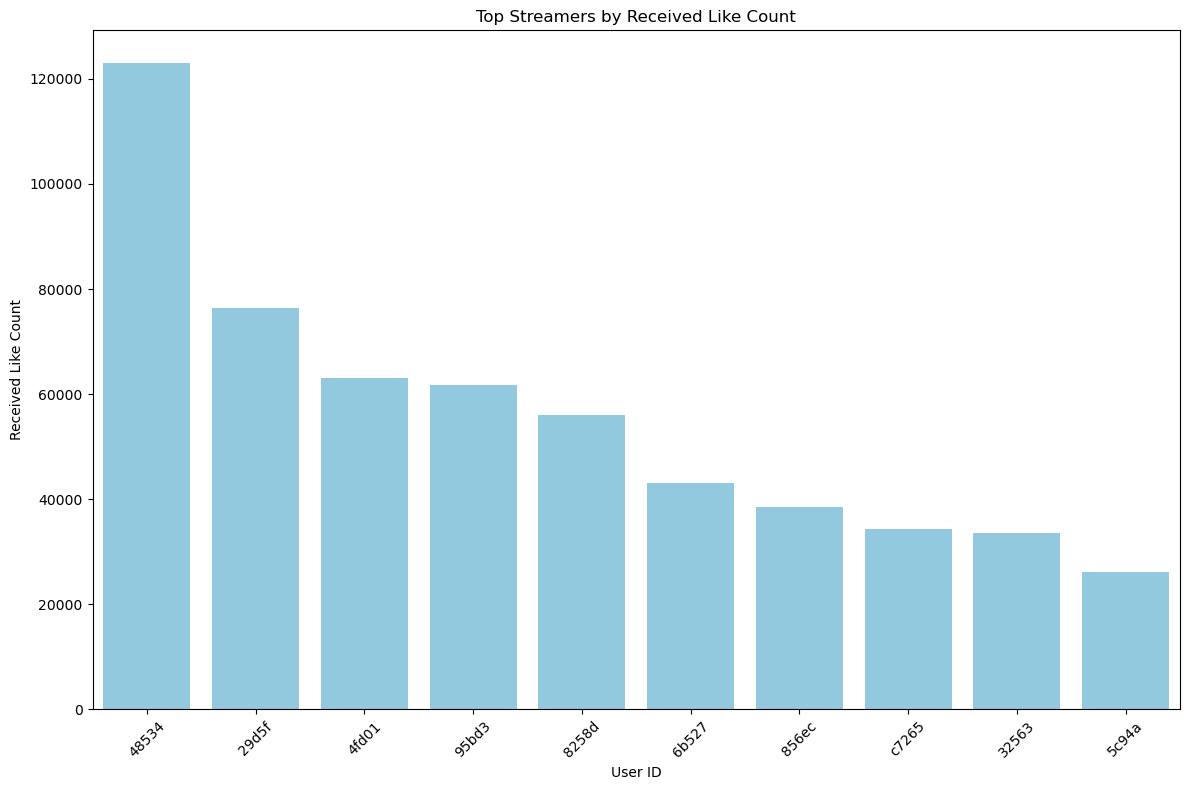

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
all_stream_info = pd.read_csv("/Users/hannah/Downloads/archive/all_stream_info.csv")

# Group by userID and aggregate statistics
streamer_grouped = all_stream_info.groupby('userID').agg({
    'receivedLikeCount': 'sum',
    'uniqueViewerCount': 'sum',
    'totalViewerDuration': 'sum'
})

# Sort the streamers based on aggregated values
top_streamers = streamer_grouped.sort_values(by=['receivedLikeCount', 'uniqueViewerCount', 'totalViewerDuration'], ascending=False)

# Round the user IDs to 5 characters
top_streamers.index = top_streamers.index.str[:5]

# Plot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=top_streamers.index[:10], y='receivedLikeCount', data=top_streamers.head(10), color='skyblue')

plt.title('Top Streamers by Received Like Count')
plt.xlabel('User ID')
plt.ylabel('Received Like Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Observations:

1. The top streamer (with userID: 48534) has a significantly higher received like count compared to the second streamer.

2. The drop-off in like count is not dramatic after the top streamer, indicating a relatively consistent level of engagement among the top streamers.

3. Based on the visualizations, it seems reasonable to prioritize engagement with the top few streamers who have received more than 6,000 likes. However, further analysis and exploration are needed before making conclusive decisions.

# Visualize top streamers based on unique viewer count and total viewer duration

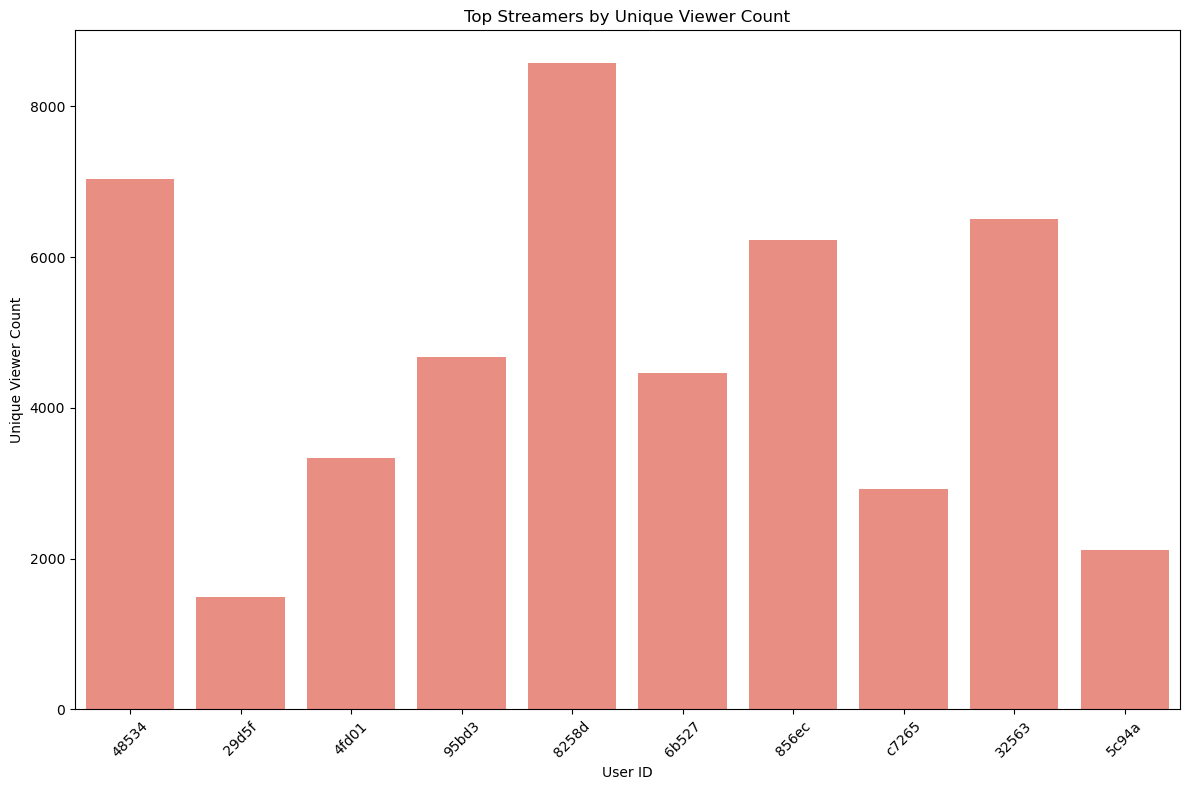

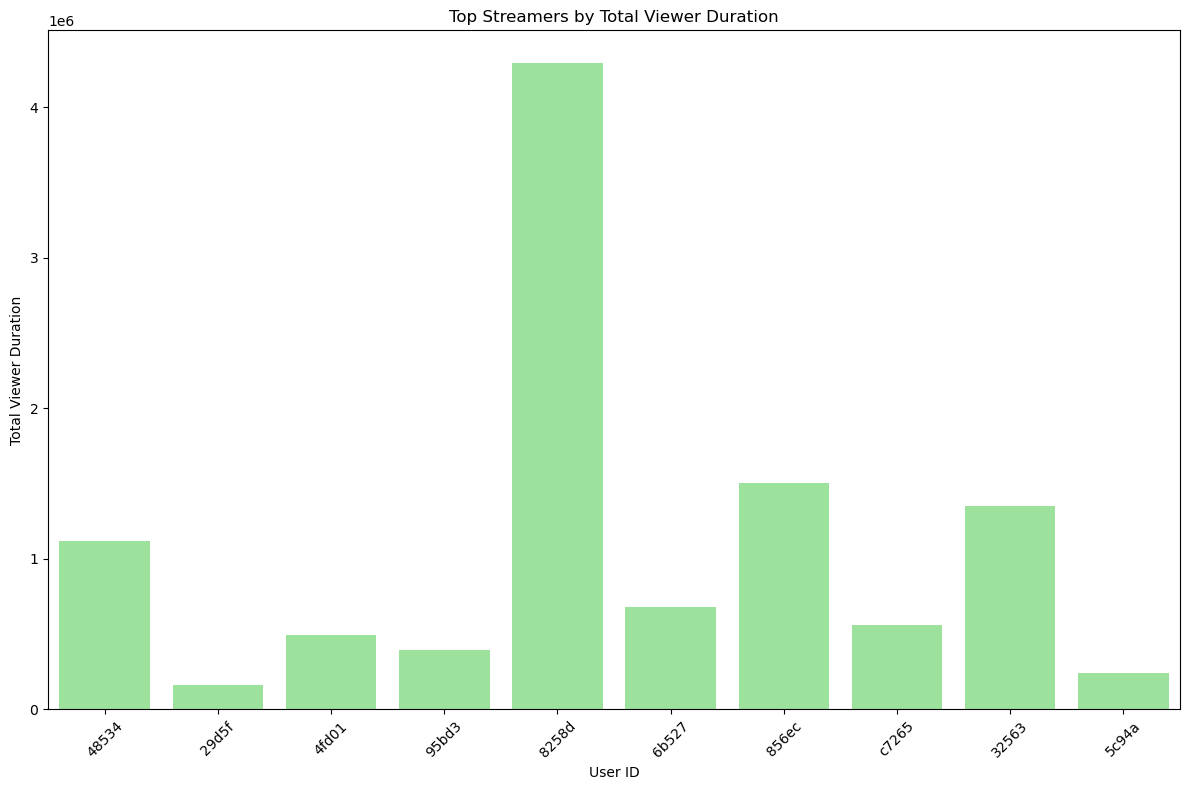

In [10]:
# Plot for Unique Viewer Count
plt.figure(figsize=(12, 8))
sns.barplot(x=top_streamers.index[:10], y='uniqueViewerCount', data=top_streamers.head(10), color='salmon')
plt.title('Top Streamers by Unique Viewer Count')
plt.xlabel('User ID')
plt.ylabel('Unique Viewer Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for Total Viewer Duration
plt.figure(figsize=(12, 8))
sns.barplot(x=top_streamers.index[:10], y='totalViewerDuration', data=top_streamers.head(10), color='lightgreen')
plt.title('Top Streamers by Total Viewer Duration')
plt.xlabel('User ID')
plt.ylabel('Total Viewer Duration')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Observations based on the plots:

1. Shift in Leadership: The top streamer based on received like count (user ID: 48534) is not leading in terms of unique viewer count or total viewer duration. This indicates that different streamers are excelling in different metrics, suggesting diversity in viewer engagement.

2. Importance of Different Metrics: While like count is a significant metric, unique viewer count and total viewer duration provide additional insights into viewer engagement and retention. It's important to consider all these metrics together to understand the overall performance of streamers on the platform.

3. Revising Strategy: Previously, there was a focus on the top streamers based on like count alone. However, with the emergence of different leaders in unique viewer count and total viewer duration, the strategy needs to be revised. Instead of focusing solely on like count, it's essential to analyze the performance of streamers across multiple metrics to identify the most impactful ones.

4. Need for Further Analysis: To determine which streamers are contributing the most to the platform's success, additional analysis is required. This may involve evaluating metrics related to revenue generation, such as subscription rates, donations, or advertising revenue. Understanding the financial impact of each streamer can help prioritize resources and provide targeted support or advice to improve performance.

5. By considering these observations and conducting further analysis, the platform can gain deeper insights into streamer performance and make informed decisions to optimize engagement and revenue generation

## Identify streamers with high engagement metrics and viewership. 
Consider metrics such as the ratio of received likes to unique viewer count and the ratio of total viewer duration to unique viewer count. These ratios can provide insights into how engaged viewers are with the streamer's content relative to the number of unique viewers

In [170]:
# Calculate engagement metrics
top_streamers['like_to_viewer_ratio'] = top_streamers['receivedLikeCount'] / top_streamers['uniqueViewerCount']
top_streamers['duration_to_viewer_ratio'] = top_streamers['totalViewerDuration'] / top_streamers['uniqueViewerCount']

# Identify streamers with high engagement metrics and viewership
high_engagement_streamers = top_streamers[
    (top_streamers['like_to_viewer_ratio'] > top_streamers['like_to_viewer_ratio'].quantile(0.75)) &
    (top_streamers['duration_to_viewer_ratio'] > top_streamers['duration_to_viewer_ratio'].quantile(0.75))
]

## Visualize the streamers with high engagement metrics and viewership

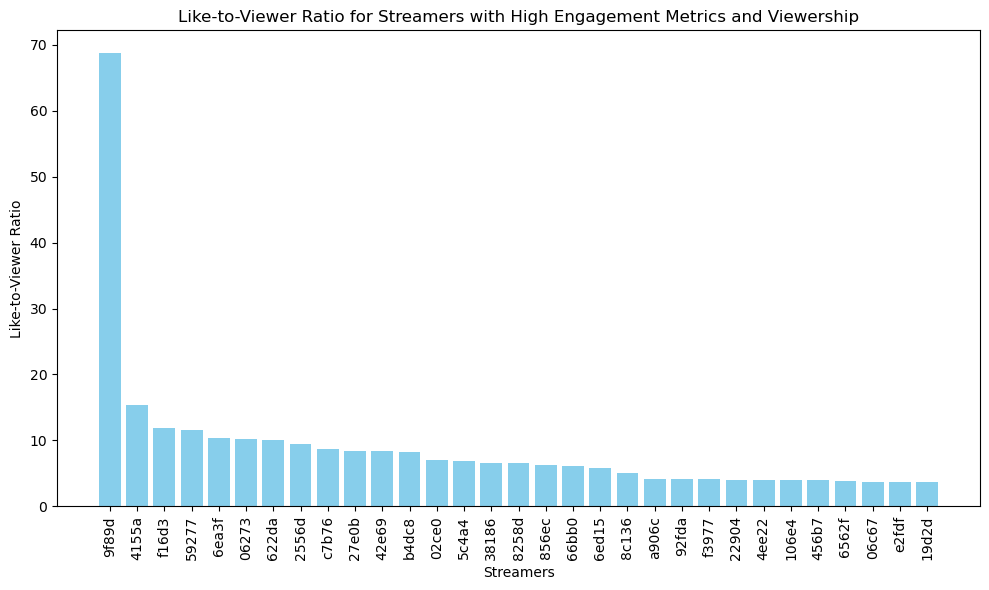

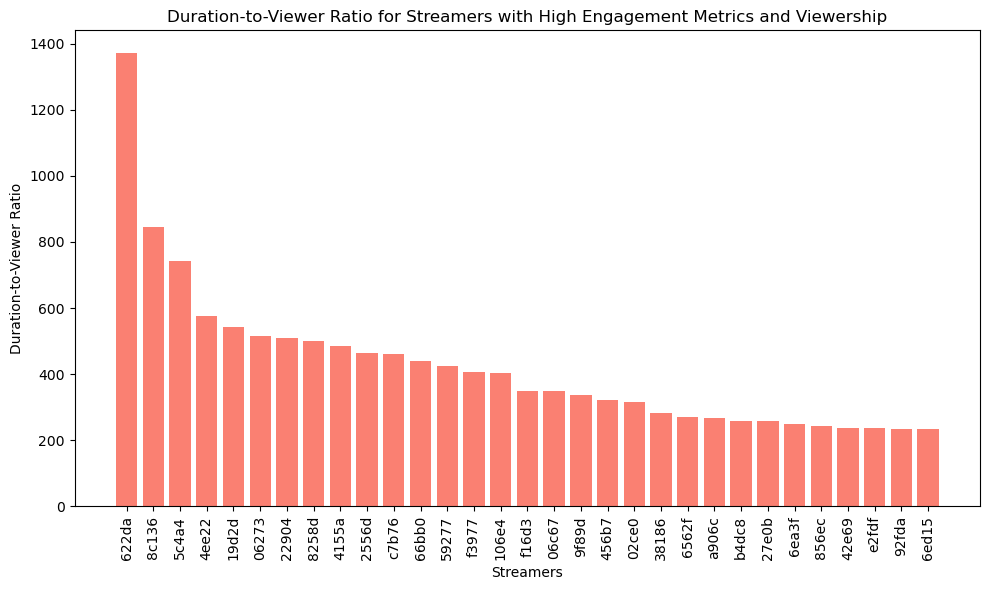

In [13]:
import matplotlib.pyplot as plt

# Sort high engagement streamers by like-to-viewer ratio in descending order
high_engagement_streamers_like_sorted = high_engagement_streamers.sort_values(by='like_to_viewer_ratio', ascending=False)

# Plot like-to-viewer ratio
plt.figure(figsize=(10, 6))
plt.bar(high_engagement_streamers_like_sorted.index, high_engagement_streamers_like_sorted['like_to_viewer_ratio'], color='skyblue')
plt.xlabel('Streamers')
plt.ylabel('Like-to-Viewer Ratio')
plt.title('Like-to-Viewer Ratio for Streamers with High Engagement Metrics and Viewership')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Sort high engagement streamers by duration-to-viewer ratio in descending order
high_engagement_streamers_duration_sorted = high_engagement_streamers.sort_values(by='duration_to_viewer_ratio', ascending=False)

# Plot duration-to-viewer ratio
plt.figure(figsize=(10, 6))
plt.bar(high_engagement_streamers_duration_sorted.index, high_engagement_streamers_duration_sorted['duration_to_viewer_ratio'], color='salmon')
plt.xlabel('Streamers')
plt.ylabel('Duration-to-Viewer Ratio')
plt.title('Duration-to-Viewer Ratio for Streamers with High Engagement Metrics and Viewership')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Observations for Like-To-Viewer and Duration-To-Viewer plots 

1. Like-to-Viewer Ratio Analysis: 
- One standout streamer with the user ID "9f89d" has a significantly higher like-to-viewer ratio compared to others. This indicates that despite having relatively fewer unique viewers, this streamer receives a high number of likes per viewer, suggesting strong viewer engagement and appreciation for the content.
- The high like-to-viewer ratio for "9f89d" implies that the content resonates strongly with the audience, resulting in a higher likelihood of viewer interaction and positive feedback.

2. Duration-to-Viewer Ratio Analysis:
- Another standout streamer with the user ID "622da" exhibits a notably higher duration-to-viewer ratio compared to others. This indicates that this streamer's content tends to have longer viewer durations relative to the number of unique viewers.
- A high duration-to-viewer ratio suggests that the content is engaging and compelling, leading viewers to spend more time watching the streamer's content compared to other streamers.

3. Importance of Standout Streamers:
- Identifying standout streamers based on engagement metrics like like-to-viewer and duration-to-viewer ratios is crucial for understanding the effectiveness of their content in capturing and retaining audience attention.
- Standout streamers like "9f89d" and "622da" may represent valuable assets for the platform, as they demonstrate the ability to engage viewers effectively and keep them invested in their content.

4. Implications for Strategy:
- The platform may consider collaborating more closely with standout streamers to leverage their strong engagement metrics and potentially enhance the overall viewer experience on the platform.
- Understanding what makes these standout streamers successful can provide valuable insights for other streamers looking to improve their content and engagement metrics.

## Analyze the beginTime and endTime of streams
Identify peak streaming hours and days. Create visualizations to show the distribution of streaming activity across different hours of the day and days of the week.

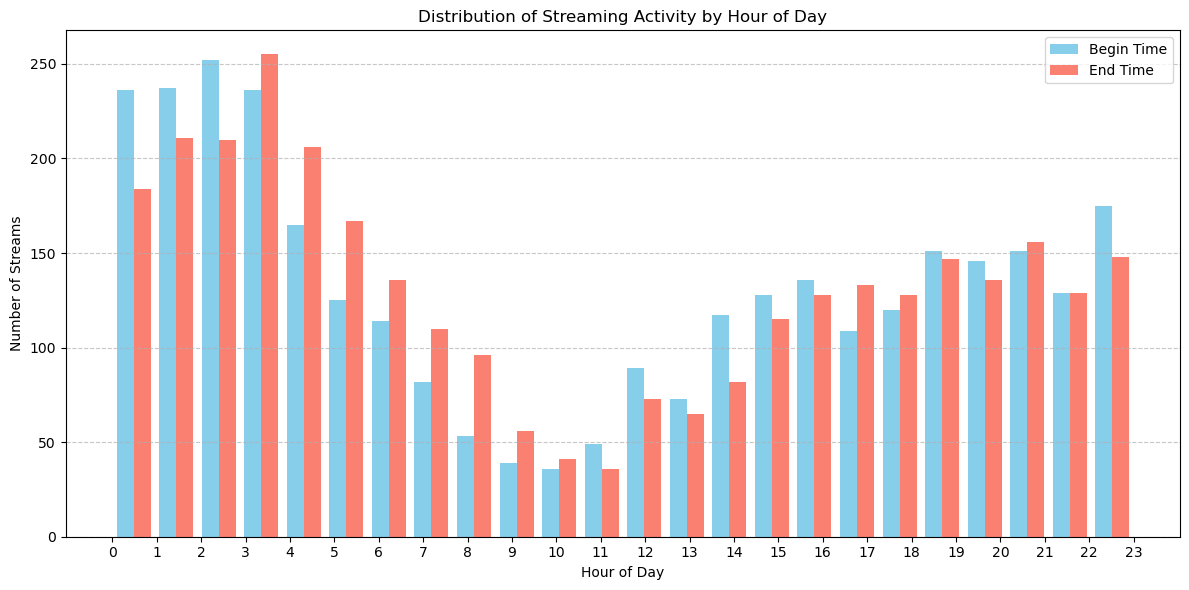

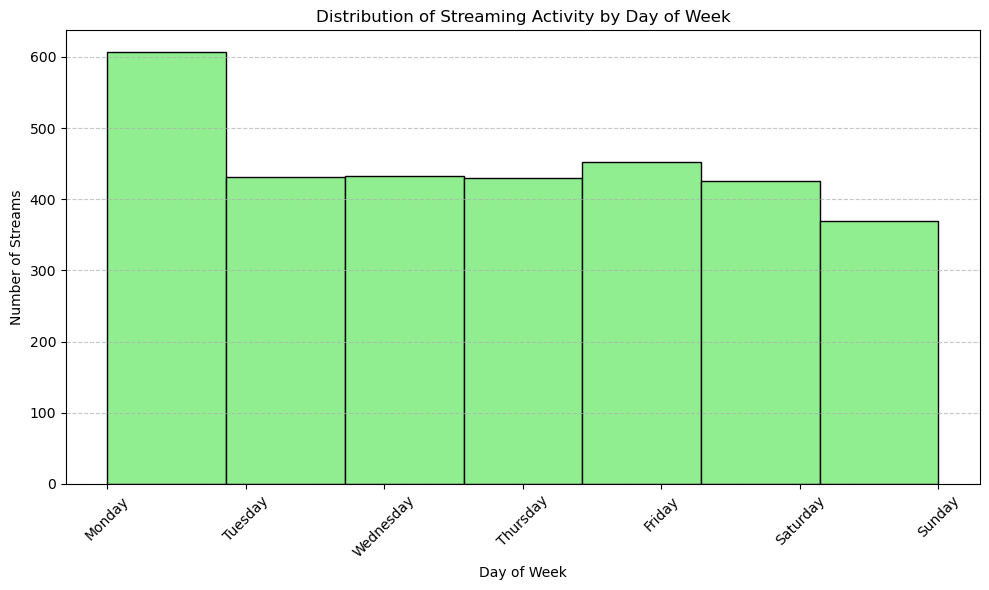

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert beginTime and endTime to datetime type
all_stream_info['beginTime'] = pd.to_datetime(all_stream_info['beginTime'])
all_stream_info['endTime'] = pd.to_datetime(all_stream_info['endTime'])

# Extract hour and day of week from beginTime and endTime
all_stream_info['beginHour'] = all_stream_info['beginTime'].dt.hour
all_stream_info['endHour'] = all_stream_info['endTime'].dt.hour
all_stream_info['dayOfWeek'] = all_stream_info['beginTime'].dt.dayofweek  # Monday=0, Sunday=6

# Plot distribution of streaming activity by hour
plt.figure(figsize=(12, 6))
plt.hist([all_stream_info['beginHour'], all_stream_info['endHour']], bins=24, color=['skyblue', 'salmon'], label=['Begin Time', 'End Time'])
plt.xlabel('Hour of Day')
plt.ylabel('Number of Streams')
plt.title('Distribution of Streaming Activity by Hour of Day')
plt.legend()
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot distribution of streaming activity by day of week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 6))
plt.hist(all_stream_info['dayOfWeek'], bins=7, color='lightgreen', edgecolor='black')
plt.xlabel('Day of Week')
plt.ylabel('Number of Streams')
plt.title('Distribution of Streaming Activity by Day of Week')
plt.xticks(range(7), days, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##  Observations based on the visualizations:

### Distribution of Streaming Activity by Hour of Day:
- Peak streaming hours are observed from 0 through 4 (midnight to early morning), indicating significant streaming activity during late hours.
- There is a notable decrease in streaming activity during the morning hours (8-12), with fewer streams initiated during this time.
- Streaming activity remains consistent and moderate during the afternoon hours, indicating steady viewership and content creation.
- Late-night hours show the maximum streaming activity, suggesting that a substantial portion of the audience prefers engaging with content during late hours.

### Distribution of Streaming Activity by Day of Week:
- Streaming activity appears relatively consistent across weekdays (Monday to Saturday), with similar levels of streaming observed.
- Sunday shows slightly lower streaming activity compared to other weekdays, with a notable difference in the number of streams initiated on this day.
- Overall, the difference in streaming activity among weekdays is minimal, indicating consistent engagement throughout the week.

## Calculate statistics such as average streaming duration, frequency of streams, and viewer count during different time periods.

In [20]:
# Calculate average streaming duration
average_duration = all_stream_info['duration'].mean()

# Calculate frequency of streams during different time periods
stream_frequency_by_hour = all_stream_info.groupby('beginHour').size()
stream_frequency_by_day = all_stream_info.groupby('dayOfWeek').size()

# Calculate viewer count during different time periods
viewer_count_by_hour = all_stream_info.groupby('beginHour')['uniqueViewerCount'].sum()
viewer_count_by_day = all_stream_info.groupby('dayOfWeek')['uniqueViewerCount'].sum()

# Visualize the data using bar plots for the frequency of streams by hour and day of week, and line plots for the viewer count by hour and day of week

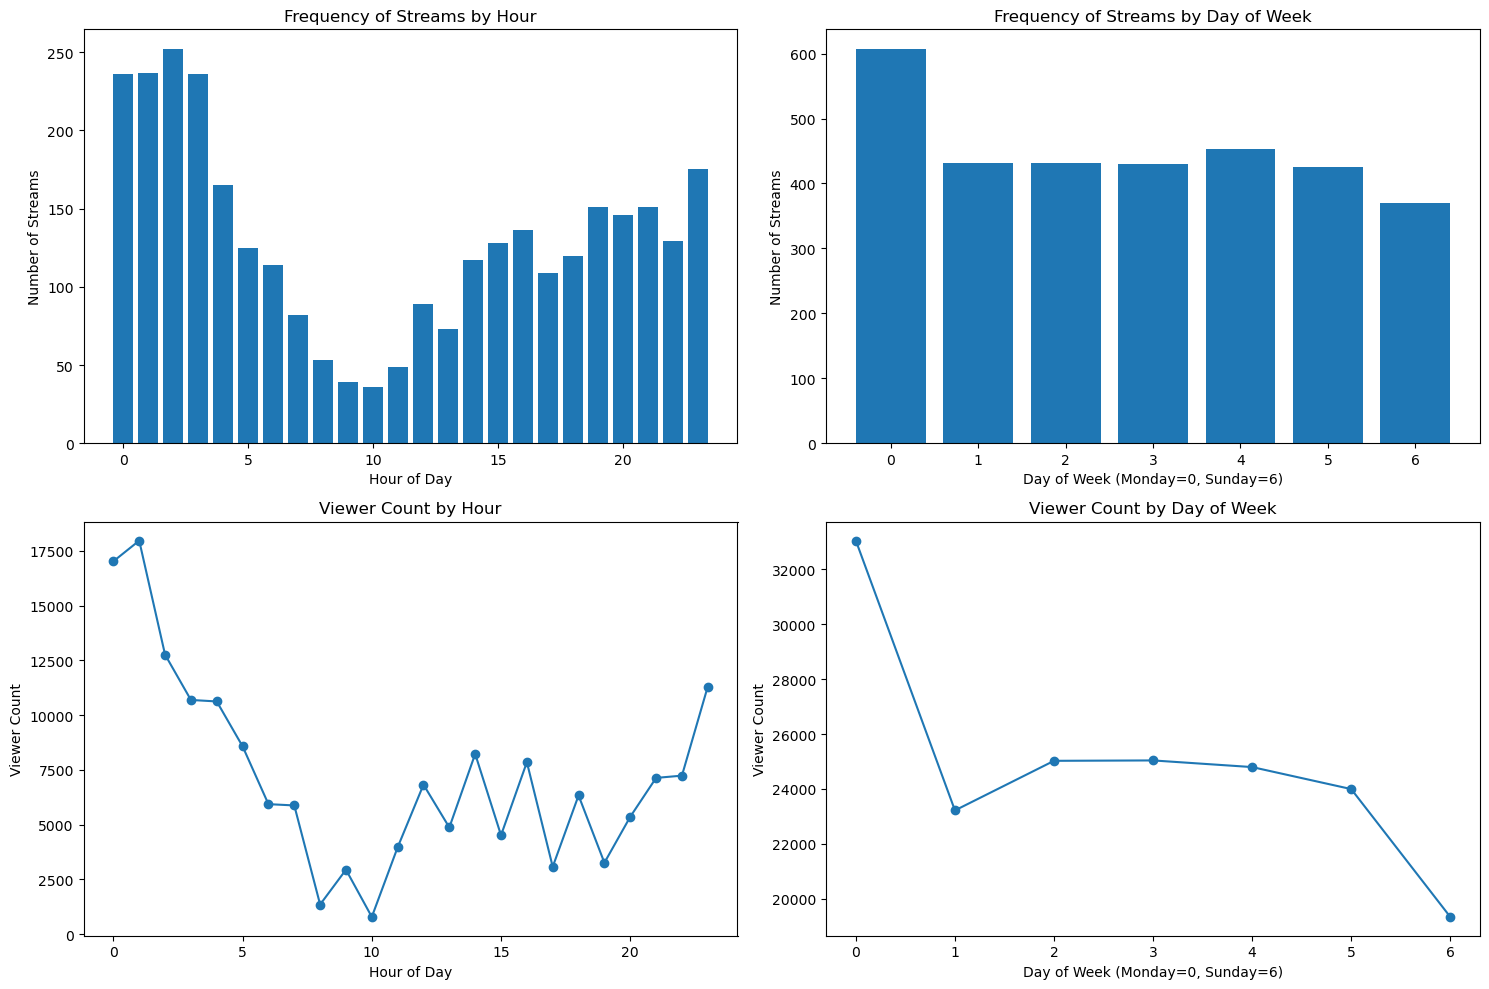

In [19]:
import matplotlib.pyplot as plt

# Set up subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot frequency of streams by hour
axs[0, 0].bar(stream_frequency_by_hour.index, stream_frequency_by_hour.values)
axs[0, 0].set_title('Frequency of Streams by Hour')
axs[0, 0].set_xlabel('Hour of Day')
axs[0, 0].set_ylabel('Number of Streams')

# Plot frequency of streams by day of week
axs[0, 1].bar(stream_frequency_by_day.index, stream_frequency_by_day.values)
axs[0, 1].set_title('Frequency of Streams by Day of Week')
axs[0, 1].set_xlabel('Day of Week (Monday=0, Sunday=6)')
axs[0, 1].set_ylabel('Number of Streams')

# Plot viewer count by hour
axs[1, 0].plot(viewer_count_by_hour.index, viewer_count_by_hour.values, marker='o')
axs[1, 0].set_title('Viewer Count by Hour')
axs[1, 0].set_xlabel('Hour of Day')
axs[1, 0].set_ylabel('Viewer Count')

# Plot viewer count by day of week
axs[1, 1].plot(viewer_count_by_day.index, viewer_count_by_day.values, marker='o')
axs[1, 1].set_title('Viewer Count by Day of Week')
axs[1, 1].set_xlabel('Day of Week (Monday=0, Sunday=6)')
axs[1, 1].set_ylabel('Viewer Count')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


# Observation based on visualization
Overall, the observations suggest a strong correlation between the frequency of streams and viewer count, indicating that streaming activity influences viewer engagement levels.

# Moving on to Points 

## Identify popular items purchased using points

In [23]:
import pandas as pd

# Load the points_transaction_log dataset
points_df = points_transaction_log

# Calculate the frequency of points transactions
transaction_frequency = points_df['type'].value_counts()

# Calculate the total points purchased
total_points_purchased = points_df[points_df['type'] == 'purchase']['point'].sum()

# Identify popular items purchased using points
popular_items = points_df[points_df['type'] == 'purchase']['giftID'].value_counts()

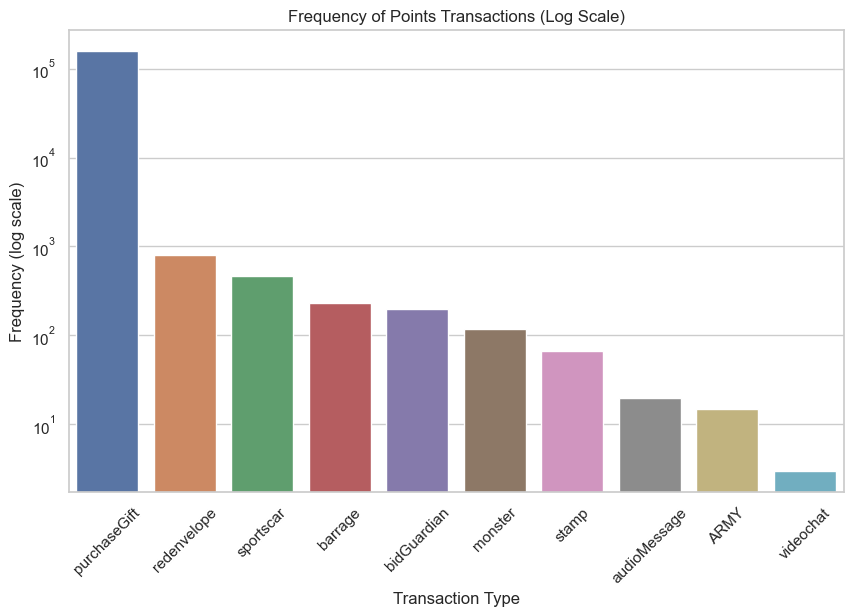

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Plot the bar chart for frequency of points transactions in log scale
plt.figure(figsize=(10, 6))
sns.countplot(data=points_df, x='type', order=points_df['type'].value_counts().index)
plt.yscale('log')  # Set y-axis to log scale
plt.title('Frequency of Points Transactions (Log Scale)')
plt.xlabel('Transaction Type')
plt.ylabel('Frequency (log scale)')
plt.xticks(rotation=45)
plt.show()

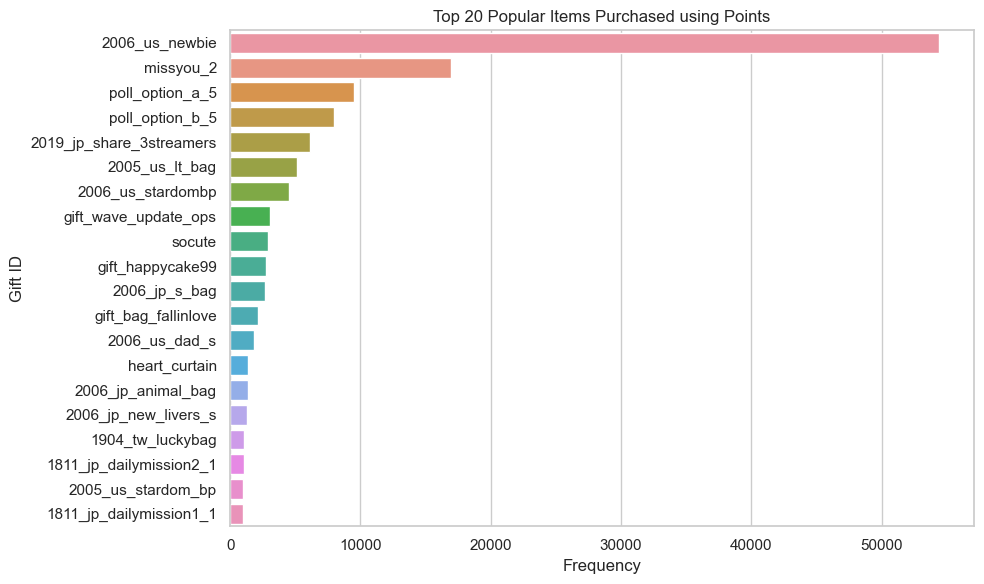

In [42]:
# Plot the bar chart for popular items purchased using points (top 20 items only)
top_20_items = points_df[points_df['type'] == 'purchaseGift']['giftID'].value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_20_items.reset_index(), x='giftID', y='index', orient='h')
plt.title('Top 20 Popular Items Purchased using Points')
plt.xlabel('Frequency')
plt.ylabel('Gift ID')
plt.tight_layout()
plt.show()


# Observations:

- The majority of points transactions are related to purchasing gifts, as evidenced by the high frequency of "purchaseGift" transactions.
- Among the top 20 popular items purchased using points, the "2006 US Newbie" gift stands out as the most frequent purchase by a significant margin.
- Other items in the top 20 also show varying levels of popularity, but none come close to the frequency of the "2006 US Newbie" gift.

## Calculate the frequency of points transactions 

In [27]:
# Group the data by 'type' and count the frequency of each type
points_transaction_frequency = points_df['type'].value_counts()

# Display the frequency of points transactions
print("Frequency of Points Transactions:")
print(points_transaction_frequency)


Frequency of Points Transactions:
purchaseGift    158371
redenvelope        800
sportscar          471
barrage            234
bidGuardian        197
monster            118
stamp               67
audioMessage        20
ARMY                15
videochat            3
Name: type, dtype: int64


## Identify patterns or trends in points transactions, such as peak transaction times

In [43]:
import pandas as pd

# Convert 'utcTimestamp' to datetime
points_df['utcTimestamp'] = pd.to_datetime(points_df['utcTimestamp'])

# Extract hour and day of week from 'utcTimestamp'
points_df['hour'] = points_df['utcTimestamp'].dt.hour
points_df['day_of_week'] = points_df['utcTimestamp'].dt.dayofweek

# Group by hour and calculate transaction frequency
hourly_transaction_frequency = points_df.groupby('hour').size()

# Group by day of week and calculate transaction frequency
daily_transaction_frequency = points_df.groupby('day_of_week').size()

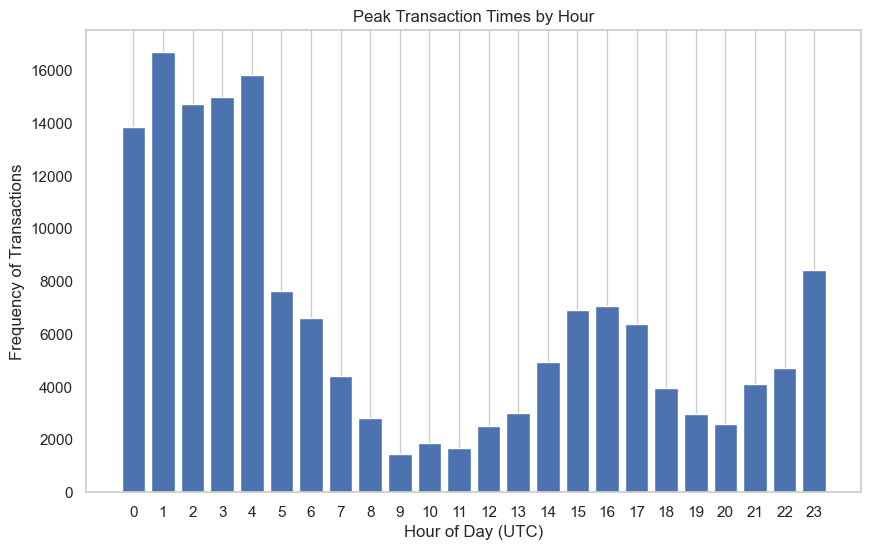

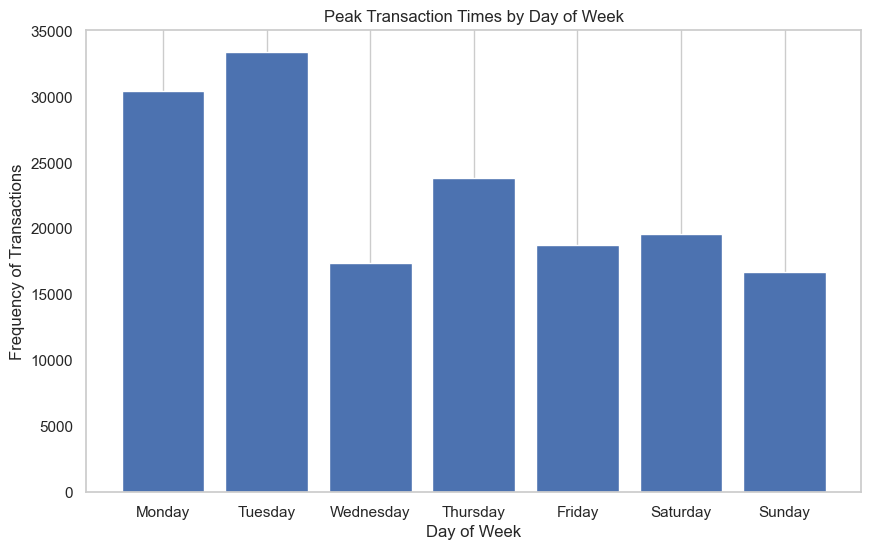

In [44]:
import matplotlib.pyplot as plt

# Plotting peak transaction times by hour
plt.figure(figsize=(10, 6))
plt.bar(hourly_transaction_frequency.index, hourly_transaction_frequency.values)
plt.title('Peak Transaction Times by Hour')
plt.xlabel('Hour of Day (UTC)')
plt.ylabel('Frequency of Transactions')
plt.xticks(range(24))
plt.grid(axis='y')
plt.show()

# Plotting peak transaction times by day of week
plt.figure(figsize=(10, 6))
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.bar(daily_transaction_frequency.index, daily_transaction_frequency.values)
plt.title('Peak Transaction Times by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Transactions')
plt.xticks(daily_transaction_frequency.index, days)
plt.grid(axis='y')
plt.show()


# observations:

### Peak Transaction Times by Hour:
- The most frequent transaction times by hour occur between 0-4 (UTC), with a significant peak at hour 4.
- There's also a subtle peak observed between 14-18 (UTC), although it's noticeably smaller compared to the peak at hour 4.
- Hours 0 through 4 (UTC) stands out as the main transaction time to be aware of due to its significantly higher frequency compared to other hours.
### Peak Transaction Times by Day of Week:
- All days of the week exhibit solid transaction frequencies, indicating consistent activity throughout the week. However, Monday and Tuesday stand out as the strongest days in terms of transaction frequency.
- Tuesday notably surpasses Wednesday in transaction frequency, indicating that Tuesday is twice as popular as Wednesday.

### Optimizing Viewer Engagement:
- Understanding peak transaction times, particularly during the early hours of the day (0-4 UTC), enables the platform to allocate resources effectively. For example, by scheduling popular content or interactive events during these hours, the platform can maximize viewer engagement and retention.
- Recognizing the subtle peak observed between 14-18 UTC allows the platform to strategically plan additional content or promotions to maintain viewer interest throughout the day. This period might be ideal for launching new releases or hosting special events to capture viewers during both peak and off-peak hours.
### Strategic Marketing and Content Promotion:
- Identifying the busiest days of the week, with a notable emphasis on Mondays and Tuesdays, empowers the platform to tailor its marketing efforts and promotional campaigns effectively. For instance, launching new features or exclusive content on these days can capitalize on the heightened viewer activity, driving further engagement and platform usage.
- By aligning promotional activities with peak transaction times and days, the platform can increase visibility and attract more viewers, ultimately fostering a stronger community and increasing user satisfaction.
### Efficient Content Management:
- Analyzing trends in transaction patterns allows the platform to optimize its content management strategy. For example, identifying popular content genres or streaming formats during specific hours or days can inform decisions regarding content acquisition, licensing agreements, and scheduling.
- By strategically managing content inventory based on transaction trends, the platform can ensure a diverse and engaging streaming library that caters to viewer preferences and maximizes viewership potential

### Install packages for next steps

## Estimate the cardinality of unique users using HyperLogLog

In [45]:
#pip install hyperloglog

In [46]:
#pip install pyprobables

In [50]:
#pip install datasketch

### Estimate the cardinality of unique users in the points dataset and find the error percentage of hyperlog

In [118]:
# Extract date component from 'utcTimestamp' column
points_df['date'] = points_df['utcTimestamp'].dt.date

In [169]:
# Find the total date range of the datset
min_date = points_df['date'].min()
max_date = points_df['date'].max()

print("Minimum Date:", min_date)
print("Maximum Date:", max_date)

Minimum Date: 2020-06-15
Maximum Date: 2020-06-23


In [54]:
import pandas as pd
from datasketch import HyperLogLog

In [130]:
# 'userID' represents distinct users
distinct_users = points_df['userID'].unique()

# Get the total count of distinct users
total_distinct_users = len(distinct_users)

print("Total count of distinct users:", total_distinct_users)

Total count of distinct users: 5868


In [143]:
import pandas as pd
from datasketch import HyperLogLog

# Initialize HyperLogLog
hll = HyperLogLog()

# Add elements (user IDs) to HLL directly from the DataFrame
for user_id in points_df['userID']:
    hll.update(user_id.encode())  # Encode user_id as bytes

# Estimate cardinality
estimated_cardinality_points = hll.count()

print("Estimated Cardinality of Unique Users:", estimated_cardinality_points)


Estimated Cardinality of Unique Users: 5650.72589958587


### Calculate the error percentage 

In [145]:
# Actual total count of distinct users
actual_total_distinct_users = 5868

# Calculate the error percentage
error_percentage = (abs(actual_total_distinct_users - estimated_cardinality_points) / actual_total_distinct_users) * 100
error_percentage_rounded = round(error_percentage,2)
print("Error of HyperLogLog:", error_percentage_rounded, "%")


Error of HyperLogLog: 3.7 %


# Now calculate distinct users for the stream data and calculate hyperlog error 

In [133]:
# 'liveStreamID' represents distinct users
distinct_users = all_stream_info['liveStreamID'].unique()

# Get the total count of distinct users
total_distinct_users = len(distinct_users)

print("Total count of distinct users:", total_distinct_users)

Total count of distinct users: 3148


In [137]:
import pandas as pd
from datasketch import HyperLogLog

# Initialize HyperLogLog
hll = HyperLogLog()

# Add elements (liveStreamID) to HLL directly from the DataFrame
for liveStreamID in all_stream_info['liveStreamID']:
    liveStreamID_bytes = int(liveStreamID).to_bytes((liveStreamID.bit_length() + 7) // 8, byteorder='big')
    hll.update(liveStreamID_bytes)

# Estimate cardinality
estimated_cardinality = hll.count()

print("Estimated Cardinality of Unique Live Streams:", estimated_cardinality)


Estimated Cardinality of Unique Live Streams: 3153.3986621839504


In [140]:
# Calculate percentage error
percentage_error = ((estimated_cardinality - total_distinct_users) / total_distinct_users) * 100

# Round the percentage error to two decimal places
percentage_error_rounded = round(percentage_error, 2)

# Print the rounded percentage error with a percentage sign
print("Rounded Percentage Error of HyperLogLog Cardinality Estimation:", percentage_error_rounded, "%")


Rounded Percentage Error of HyperLogLog Cardinality Estimation: 0.17 %


# This error is very small. Now use the hyperlog to estimate cardinality for each day of the week. 

### first add a column with the date simply with day month and year 

In [147]:
# Extract date component from 'utcTimestamp' column
all_stream_info['date'] = all_stream_info['beginTime'].dt.date

### Find the start and end date of the data

In [149]:
# Assuming 'utcTimestamp' is the name of the column containing timestamps in points_df
min_date = all_stream_info['date'].min()
max_date = all_stream_info['date'].max()

print("Minimum Date:", min_date)
print("Maximum Date:", max_date)

Minimum Date: 2020-06-15
Maximum Date: 2020-06-22


### Compute the cardinality estimates for each day of the week

In [150]:
import pandas as pd
from datasketch import HyperLogLog

# Assuming 'date' is the name of the column containing timestamps in all_stream_info DataFrame
all_stream_info['date'] = pd.to_datetime(all_stream_info['date'])

# Initialize an empty DataFrame to store the results
cardinality_by_day_of_week = pd.DataFrame(columns=['Day of Week', 'Estimated Cardinality'])

# Iterate over each day of the week
for day in range(7):
    # Filter data for the current day of the week
    filtered_data = all_stream_info[all_stream_info['date'].dt.dayofweek == day]
    
    # Initialize HyperLogLog for the current day of the week
    hll = HyperLogLog()
    
    # Add elements (liveStreamID) to HLL directly from the DataFrame
    for liveStreamID in filtered_data['liveStreamID']:
        liveStreamID_bytes = int(liveStreamID).to_bytes((liveStreamID.bit_length() + 7) // 8, byteorder='big')
        hll.update(liveStreamID_bytes)
    
    # Estimate cardinality for the current day of the week
    estimated_cardinality = hll.count()
    
    # Append the result to the DataFrame
    cardinality_by_day_of_week = cardinality_by_day_of_week.append({'Day of Week': day, 'Estimated Cardinality': estimated_cardinality}, ignore_index=True)

# Print the cardinality estimates for each day of the week
print(cardinality_by_day_of_week)


   Day of Week  Estimated Cardinality
0          0.0             645.470658
1          1.0             423.259429
2          2.0             403.170696
3          3.0             445.059828
4          4.0             488.343369
5          5.0             428.537967
6          6.0             367.181717


/Users/hannah/anaconda3/lib/python3.10/site-packages/datasketch/hyperloglog.py:151: UserWarning: Warning: estimate is close to error correction threshold. Output may not satisfy HyperLogLog accuracy guarantee.
  warnings.warn(
/var/folders/fn/y37l7tw52bs7r94fz3jsnwc40000gq/T/ipykernel_31560/2918362567.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cardinality_by_day_of_week = cardinality_by_day_of_week.append({'Day of Week': day, 'Estimated Cardinality': estimated_cardinality}, ignore_index=True)
/var/folders/fn/y37l7tw52bs7r94fz3jsnwc40000gq/T/ipykernel_31560/2918362567.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cardinality_by_day_of_week = cardinality_by_day_of_week.append({'Day of Week': day, 'Estimated Cardinality': estimated_cardinality}, ignore_index=True)
/var/folders/fn/y37l7tw52bs7r94fz

# Plot  the cardinality estimates for each day of the week

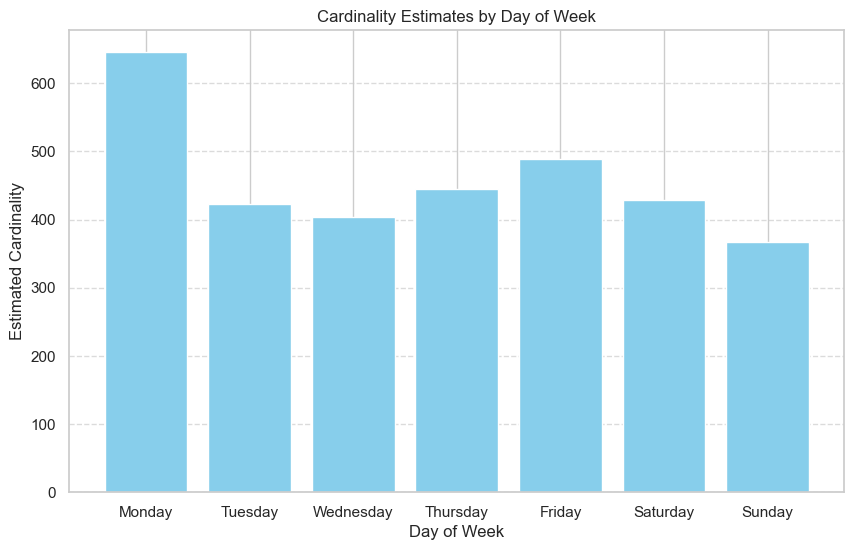

In [151]:

# Plot the cardinality estimates for each day of the week
plt.figure(figsize=(10, 6))
plt.bar(cardinality_by_day_of_week['Day of Week'], cardinality_by_day_of_week['Estimated Cardinality'], color='skyblue')
plt.xlabel('Day of Week')
plt.ylabel('Estimated Cardinality')
plt.title('Cardinality Estimates by Day of Week')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [168]:
# Convert 'beginTime' column to datetime
all_stream_info['beginTime'] = pd.to_datetime(all_stream_info['beginTime'])

# Extract hour of the day and create a new column
all_stream_info['hour_of_day'] = all_stream_info['beginTime'].dt.hour


# Now compute and plot the cardinality estimates for hours of the day 

/var/folders/fn/y37l7tw52bs7r94fz3jsnwc40000gq/T/ipykernel_31560/3514871382.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cardinality_by_hour = cardinality_by_hour.append({'Hour': hour, 'Estimated Cardinality': estimated_cardinality}, ignore_index=True)
/var/folders/fn/y37l7tw52bs7r94fz3jsnwc40000gq/T/ipykernel_31560/3514871382.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cardinality_by_hour = cardinality_by_hour.append({'Hour': hour, 'Estimated Cardinality': estimated_cardinality}, ignore_index=True)
/var/folders/fn/y37l7tw52bs7r94fz3jsnwc40000gq/T/ipykernel_31560/3514871382.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cardinality_by_hour = cardinality_by_hour.append({'Hour': hour, 'Estimated Cardina

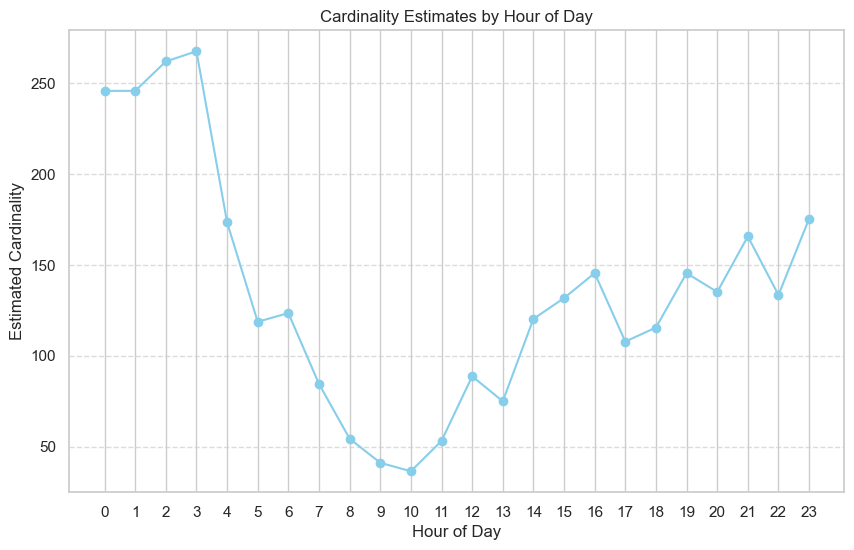

In [167]:
import pandas as pd
from datasketch import HyperLogLog
import matplotlib.pyplot as plt


# Initialize an empty DataFrame to store the results
cardinality_by_hour = pd.DataFrame(columns=['Hour', 'Estimated Cardinality'])

# Iterate over each hour of the day
for hour in range(24):
    # Filter data for the current hour
    filtered_data = all_stream_info[all_stream_info['hour_of_day'] == hour]
    
    # Initialize HyperLogLog for the current hour
    hll = HyperLogLog()
    
    # Add elements (liveStreamID) to HLL directly from the DataFrame
    for liveStreamID in filtered_data['liveStreamID']:
        liveStreamID_bytes = int(liveStreamID).to_bytes((liveStreamID.bit_length() + 7) // 8, byteorder='big')
        hll.update(liveStreamID_bytes)
    
    # Estimate cardinality for the current hour
    estimated_cardinality = hll.count()
    
    # Append the result to the DataFrame
    cardinality_by_hour = cardinality_by_hour.append({'Hour': hour, 'Estimated Cardinality': estimated_cardinality}, ignore_index=True)

# Plot the cardinality estimates for each hour of the day
plt.figure(figsize=(10, 6))
plt.plot(cardinality_by_hour['Hour'], cardinality_by_hour['Estimated Cardinality'], marker='o', color='skyblue')
plt.xlabel('Hour of Day')
plt.ylabel('Estimated Cardinality')
plt.title('Cardinality Estimates by Hour of Day')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Observations from cardinality estimates for day of week and hour of day 

The cardinality estimates derived from the HyperLogLog algorithm offer valuable insights not only into peak streaming periods but also into less opportune times for content creators. For instance, during hours 9 and 10, the number of unique streamers dwindles to less than 50, starkly contrasting with the bustling activity observed during peak hours like 2 and 3, where over 250 unique streamers are active. This striking disparity underscores the significance of timing in maximizing viewership and engagement. In percentage terms, the difference between these low and high activity hours is staggering, with a reduction of over 80% in unique streamers during the lull hours compared to the peak hours.

Furthermore, our analysis highlights the paramount importance of the time of day over the day of the week. While Mondays stand out with over 600 unique streamers, other days hover around 400 unique streamers. This translates to a substantial percentage difference, with Mondays boasting approximately 50% more unique streamers compared to other weekdays. However, the most compelling revelation is that, despite variations in daily counts, streaming activity persists across all days of the week, indicating a consistent level of engagement among users.

In conclusion, our findings emphasize the critical role of timing in optimizing streaming performance. By strategically scheduling streams during peak hours and avoiding lull periods, content creators can harness the largest viewing window to maximize their reach and monetization opportunities. This underscores the importance of data-driven insights in guiding content creation strategies and empowering streamers to capitalize on the dynamic nature of viewer behavior.

# Use Apriori Algorithm to find frequent item sets in purchase behavior 

In [26]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules


# One-hot encoding
onehot = points_transaction_log.groupby(['userID', 'giftID']).size().unstack().reset_index().fillna(0).set_index('userID')

# Convert counts to binary values
onehot = onehot.applymap(lambda x: 1 if x >= 1 else 0)

# Find frequent item sets using Apriori
frequent_itemsets = apriori(onehot, min_support=0.1, use_colnames=True)

# Find association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)


/Users/hannah/anaconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


# Value of frequent item sets 
The frequent item sets show the support value along with the item sets, while association rules display antecedents, consequents, support, confidence, lift, and other related metrics.

In [27]:
print("Frequent Item Sets:")
frequent_itemsets

Frequent Item Sets:


,support,itemsets
0,0.282379,(2006_us_newbie)
1,0.116224,(2019_jp_share_3streamers)
2,0.106510,(2019newuser)
3,0.244547,(gift_wave_update_ops)
4,0.125596,(missyou_2)
5,0.106851,"(2006_us_newbie, missyou_2)"


In [28]:
print("\nAssociation Rules:")
rules


Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(2006_us_newbie),(missyou_2),0.282379,0.125596,0.106851,0.378395,3.012782,0.071385,1.406686,0.930966
1,(missyou_2),(2006_us_newbie),0.125596,0.282379,0.106851,0.850746,3.012782,0.071385,4.808061,0.764042



# Based on the provided data and analysis:

### Frequent Item Sets:
- The most frequent item set, "2006_us_newbie", has a support of approximately 28.24%, indicating that around 28.24% of the transactions involve this item.
- Other frequent item sets include "2019_jp_share_3streamers" (11.62%), "2019newuser" (10.65%), "gift_wave_update_ops" (24.45%), and "missyou_2" (12.56%).

### Association Rules:
- One association rule found is between "2006_us_newbie" and "missyou_2". It states that if a user purchases "2006_us_newbie", there's a confidence of approximately 37.84% that they will also purchase "missyou_2". This rule has a lift value of around 3.01, indicating that the presence of "2006_us_newbie" in a transaction increases the likelihood of "missyou_2" being purchased by about three times compared to its individual support.

### Transaction Patterns:
- The data seems to contain information about various types of gifts, user IDs, and transaction details.
- "gift_wave_update_ops" appears to be a popular item, suggesting it might be related to a promotional campaign or special offer.
- There's a significant association between "2006_us_newbie" and "missyou_2", indicating a potential cross-promotion opportunity or correlation between these two items.

### Potential Insights:
- Further analysis could explore the relationship between different types of gifts and user behavior.
- Understanding the patterns of gift transactions could help optimize marketing strategies or recommend personalized gift options to users.
- Exploring the temporal aspects of transactions, such as trends over time or seasonality, could provide additional insights into user behavior and preferences.

Overall, the data presents valuable opportunities for understanding user preferences, optimizing promotional activities, and enhancing the overall user experience in the gift-giving process.

# Summary with Real Conclusions:

In this project, we've delved into data-driven strategies to optimize monetization on streaming platforms. Through thorough analysis, we've uncovered valuable insights that inform actionable recommendations for maximizing revenue generation.

### Key Findings:

Identifying Popular Streamers: Our analysis revealed that identifying top streamers requires a holistic approach, considering metrics such as received like count, unique viewer count, and total viewer duration. This comprehensive evaluation ensures that all streaming leaders, who are assets to the platform, are captured. Streamers excelling in different metrics represent diverse opportunities for collaboration and content promotion.

Optimizing Streaming Schedule: Monday emerged as the most favorable streaming day, with peak streaming hours observed from 0 to 4 hours UTC. Aligning streaming schedules with these peak times not only maximizes viewer engagement but also corresponds to peak transaction times, indicating an optimal window for content creation and promotion.

Promoting Points Transactions: The Hyperloglog algorithm provided accurate estimations of peak streaming hours and days, corroborating our EDA findings. With low errors under 1%, this algorithm offers a reliable tool for real-time data analytics on streaming behavior. Furthermore, the Apriori algorithm identified associations between items, suggesting promotional opportunities such as promoting "gift_wave" and running joint campaigns for "2006_us_newbie" and "missyou."

### Recommended Next Steps:

Further Exploration: Continue exploring user behavior and preferences to refine personalized marketing strategies and content recommendations.
Experimentation: Implement A/B testing to evaluate the effectiveness of different promotional campaigns and pricing models. Explore partnerships and sponsorship opportunities to enhance revenue streams.

Feedback Loop: Establish a feedback mechanism with users to gather insights and iterate on monetization strategies. Use real-time data analytics to adapt to changing viewer preferences and market trends.
Utilize Apriori Algorithm: Leverage the Apriori algorithm for ongoing analysis of streaming behavior and points transactions. Utilize its accurate estimations to inform strategic decision-making and optimize revenue generation.
By leveraging these insights and recommendations, streaming platforms can enhance viewer engagement, drive revenue growth, and maintain a competitive edge in the dynamic digital landscape.